In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


'''
Add an overweight column to the data. To determine if a person is overweight, 
first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
If that value is > 25 then the person is overweight.
Use the value 0 for NOT overweight and the value 1 for overweight.
'''

In [6]:
df['Overweight'] = np.where( round(df['weight'] / (df['height'] / 100)**2 , 1 ) > 25, 0,1)
df.head(3)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1


'''
Normalize the data by making 0 always good and 1 always bad.
If the value of cholesterol or gluc is 1, make the value 0. 
If the value is more than 1, make the value 1.
'''

In [7]:
df['cholesterol'] = np.where(df['cholesterol'] ==1 , 0, 1)
df['gluc'] = np.where(df['gluc'] ==1 , 0, 1)
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1


 # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [8]:
# df_cat = pd.melt(df,value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'] )
df_cat = pd.melt(df, value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active', 'Overweight'])
df_cat

,variable,value
0,cholesterol,0
1,cholesterol,1
2,cholesterol,1
3,cholesterol,0
4,cholesterol,0
...,...,...
419995,Overweight,0
419996,Overweight,0
419997,Overweight,0
419998,Overweight,0


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

In [25]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active', 'Overweight'])
df_cat = pd.melt(df, id_vars=['cardio'],
                 value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active', 
                             'Overweight']).value_counts().reset_index()
df_cat['value'] = df_cat['value'].astype(str) #To avoid errors on replit, Needs to change to strings, otherwise it'll results on error
df_cat.sort_values(by='variable', inplace=True)
df_cat

,cardio,variable,value,0
11,0,Overweight,0,19006
14,1,Overweight,1,10617
12,0,Overweight,1,16015
9,1,Overweight,0,24362
17,0,active,0,6378
15,1,active,0,7361
6,0,active,1,28643
8,1,active,1,27618
22,0,alco,1,1941
0,1,alco,0,33156


D:\Users\debbu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


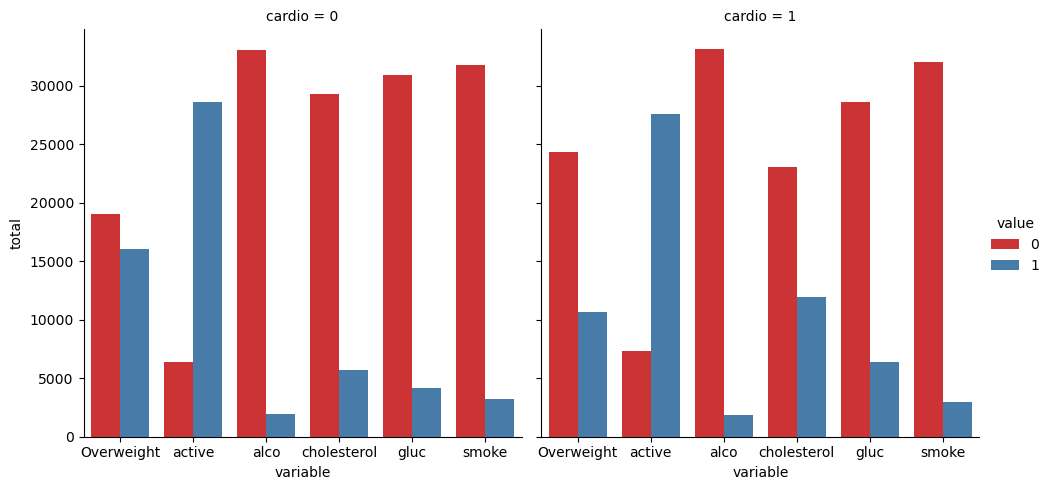

In [24]:
cat_plot = sns.catplot( data=df_cat, x='variable', y=0, kind='bar', col='cardio' , hue='value' , palette='Set1' )
cat_plot.set_axis_labels('variable', 'total')

In [26]:
fig = cat_plot.figure

# Draw Heat Map

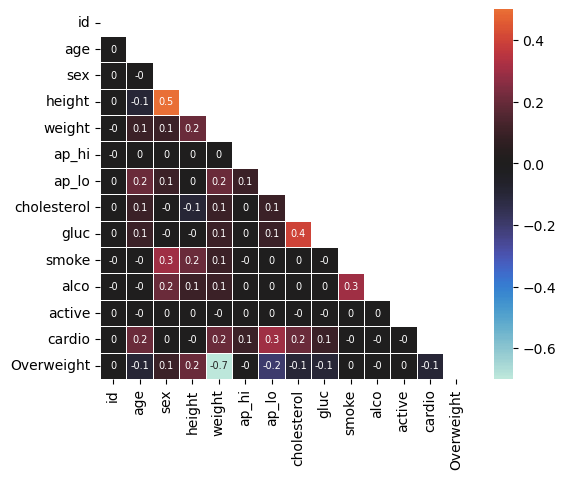

In [30]:
df_heat = df
drop_data = df_heat[ (df_heat['weight'] >= df_heat['weight'].quantile(0.975))  #5 weight is more than the 97.5th percentile
               | (df_heat['weight'] <= df_heat['weight'].quantile(0.025)) #4 weight is less than the 2.5th percentile
               | (df_heat['height'] >= df_heat['height'].quantile(0.975)) #3 height is more than the 97.5th percentile
               | (df_heat['height'] <= df_heat['height'].quantile(0.025)) #2 height is less than the 2.5th percentile
               | (df_heat['ap_lo'] >= df_heat['ap_hi'])].index #1 diastolic pressure is higher than systolic ap_lo > ap_hi

df_heat.drop(drop_data, inplace=True)
# Calculate the correlation matrix
corr = df_heat.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with 'sns.heatmap()'
heatmap_fig = sns.heatmap(corr, annot=True, square=True, center=0, annot_kws={'fontsize':7 }, linewidths=0.5, mask=mask)
fig = heatmap_fig.figure
